## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

In [2]:
np.set_printoptions(precision=4)

# Illustration of Python lists vs. Numpy arrays

In [3]:
print("Python list operations:")
a = [1,2,3]
b = [4,5,6]
print("a+b:", a + b)
try:
    print(a * b)
except TypeError:
    print("a*b has no meaning for Python lists")
print()
print("Numpy array operations:")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b:", a + b)
print("a*b:", a * b)

Python list operations:
a+b: [1, 2, 3, 4, 5, 6]
a*b has no meaning for Python lists

Numpy array operations:
a+b: [5 7 9]
a*b: [ 4 10 18]


In [4]:
a = np.array([[1,2,3],
              [4,5,6]]) 
print(a)

[[1 2 3]
 [4 5 6]]


In [5]:
b = np.array([10,20,30])
print("a + b:\n", a + b)

a + b:
 [[11 22 33]
 [14 25 36]]


In [10]:
print('a:')
print(a)
print('a.sum(axis=0):', a.sum(axis=0))
print('a.sum(axis=1):', a.sum(axis=1))

a:
[[1 2 3]
 [4 5 6]]
a.sum(axis=0): [5 7 9]
a.sum(axis=1): [ 6 15]


# Basic functions

In [6]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

### Looking at the above examples, write a function that applies the normal ReLU function

In [10]:
#ReLU Here
def relu(x: ndarray) -> ndarray:
    return np.maximum(x, 0)


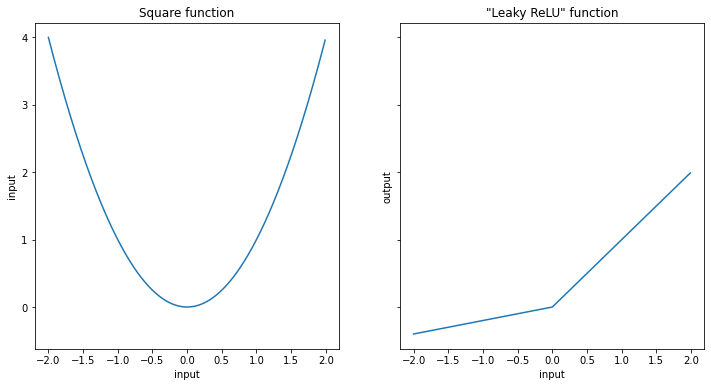

In [24]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"Leaky ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output');

### Try to write some code to plot your ReLU function

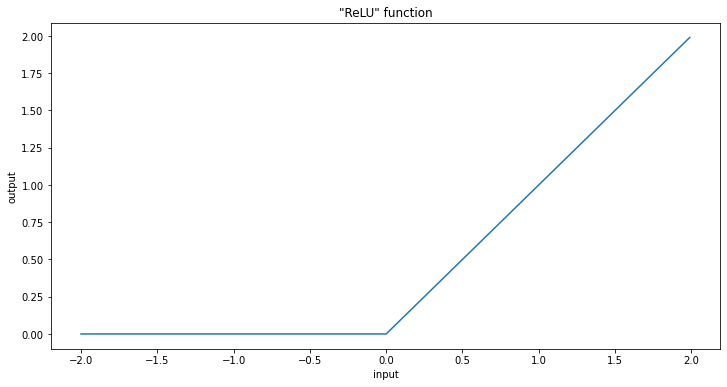

In [18]:
#Plot ReLU

fig, ax = plt.subplots(1, 1, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax.plot(input_range, relu(input_range))
ax.set_title('"ReLU" function')
ax.set_xlabel('input')
ax.set_ylabel('output');  # the semicolon removes 'Text(0, 0.5, 'output')' from the output and displays only the graph


In [20]:
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray],  # "Callable" specifies that the input must be a function that takes in an array of ndarrays and returns an ndarray
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

# `Chain`

In [21]:
from typing import List

# Let's create a new type of object, which holds two functions that act on ndarrays. We do this so we can write a function that takes this object as input.

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

### Use the above types to code a function that evaluates a function of a function in a chain

In [26]:
def chain_length_2(chain: Chain, 
                   input_: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''

    assert len(chain) == 2, "Length of input 'chain' should be 2"    # There should only be two functions to chain
    
    # apply the first function to the data, then apply the second function to the output of the first function
    return chain[1](chain[0](input_))


## Chain derivative

### Start by writing a function that applies sigmoid to the input array:

In [25]:
#Sigmoid Here

def sigmoid(x: ndarray) -> ndarray:
    """
    Apply the sigmoid function to each element in an ndarray.
    """
    return 1 / (1 + np.exp(-x))


### Try to code a function to take the derivative of a chain (chain rule), answer found below if needed:

In [33]:
#Chain rule

# def chain_deriv_2(chain: Chain, x: ndarray) -> ndarray:
#     '''
#     chain rule: f'(g(x))g'(x)
#     let chain[0] be f(x) and chain[1] be g(x)
#     '''
#     newChain = [deriv(chain[0]), chain[1]]
#     term1 = chain_length_2(newChain, x)
#     term2 = deriv(chain[1], x)
    
#     return term1 * term2
    

### Chain_deriv_2 code solution:

In [26]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du

### Plotting Functions

In [30]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - 
    Across the input_range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [34]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a function consisting of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

TypeError: deriv() missing 1 required positional argument: 'input_'

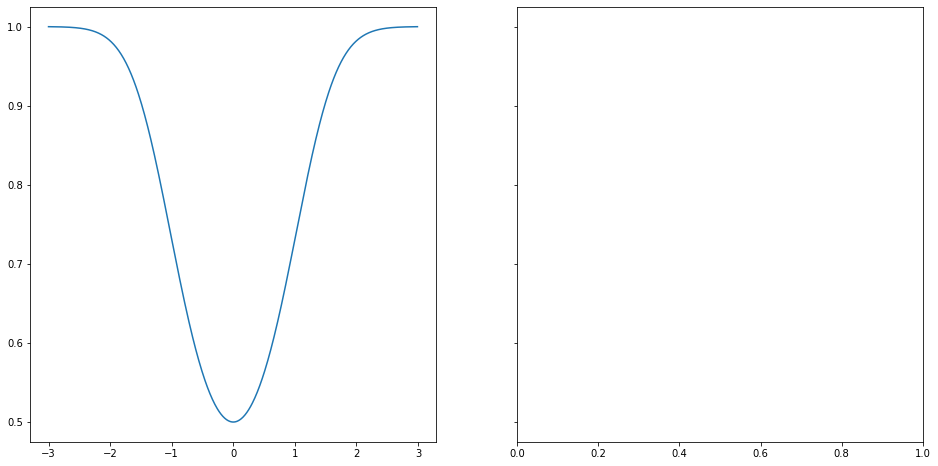

In [35]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");

# `Chain of length 3`

In [10]:
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".
    '''
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

In [11]:
def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = deriv(f3, f2_of_x)

    # df2du
    df2du = deriv(f2, f1_of_x)

    # df1dx
    df1dx = deriv(f1, input_range)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du

In [36]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray,
               length: int=2) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - across one range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

In [37]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

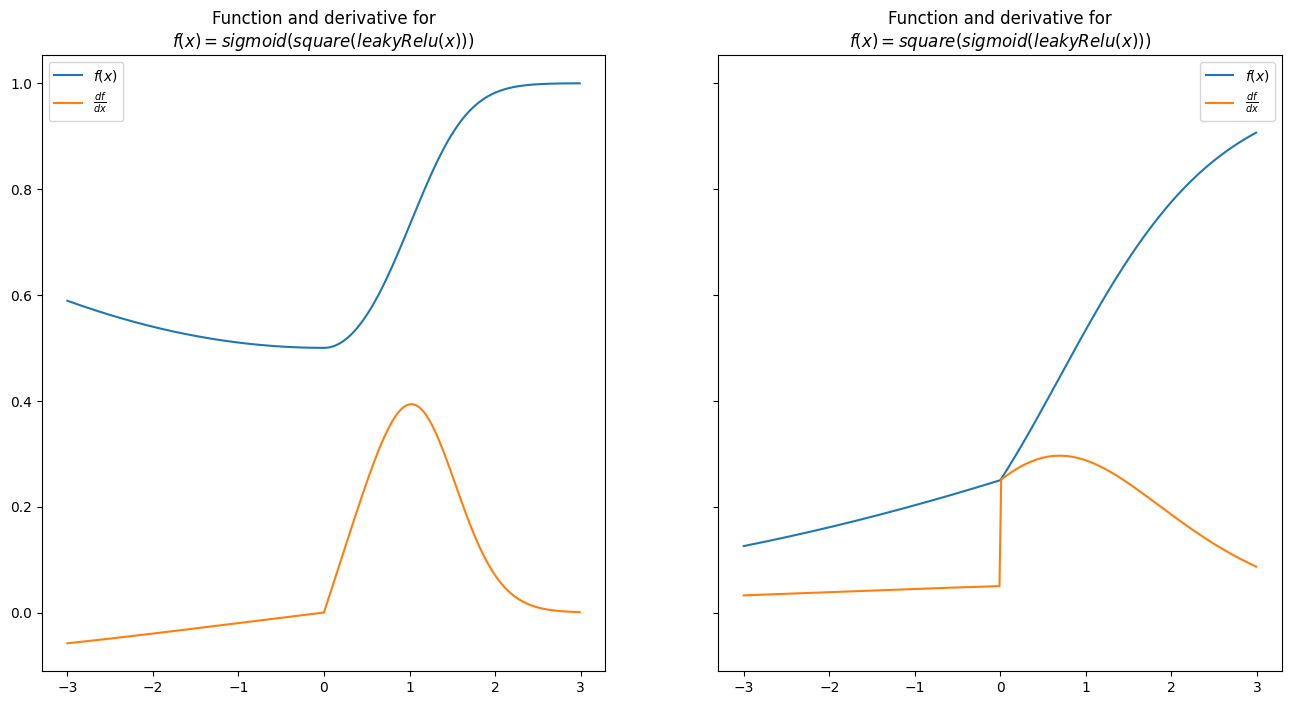

In [35]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRelu(x)))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");

# plt.savefig(IMG_FOLDER_PATH + "09_plot_chain_rule_2.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "09_plot_chain_rule_2.pdf");

### Using the above functions as building blocks, make a chain of length 3 including the ReLU function you made and plot it with its derivative:

In [38]:
### ReLU Chain:






# Function with multiple inputs example

In [24]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    Function with multiple inputs and addition, forward pass
    '''
    assert x.shape == y.shape

    a = x + y
    return sigma(a)

In [25]:
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    '''
    Computes the derivative of this simple function with respect to
    both inputs
    '''
    # Compute "forward pass"
    a = x + y

    # Compute derivatives
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady